In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

from pathlib import Path

from hubmap.visualization import visualize_checkpoint
from hubmap.visualization import visualize_image

from hubmap.dataset import TrainDataset, ValDataset
from hubmap.data import DATA_DIR
from checkpoints import CHECKPOINT_DIR
import hubmap.dataset.transforms as T

In [ ]:
ckpt = "tResUNet_run_2.pt"

(<Figure size 400x400 with 1 Axes>, <Figure size 400x400 with 1 Axes>)

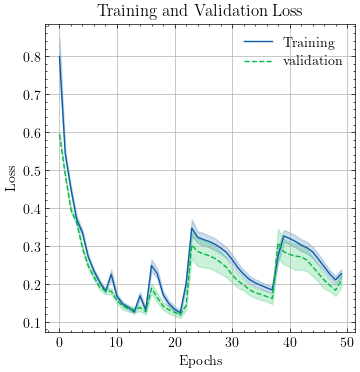

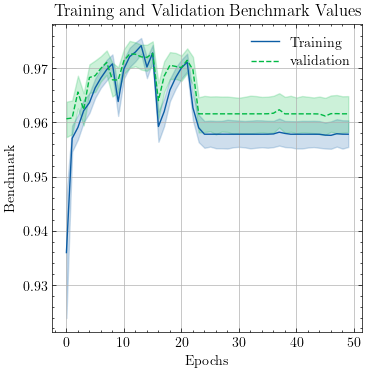

In [4]:
visualize_checkpoint(ckpt)

In [5]:
import torch

train_dataset_mean = torch.load(DATA_DIR / "train_dataset_mean.pt")
train_dataset_std = torch.load(DATA_DIR / "train_dataset_std.pt")

In [6]:
transforms = T.Compose(
    [
        T.ToTensor(mask_as_integer=True),
        T.Resize((64, 64)),
        T.Normalize(train_dataset_mean, train_dataset_std),
    ]
)
model_transforms = T.Compose(
    [
        T.ToTensor(mask_as_integer=True),
        T.Resize((64, 64)),
        T.Normalize(train_dataset_mean, train_dataset_std),
    ]
)

dataset = TrainDataset(
    DATA_DIR, transform=transforms, with_background=True, as_id_mask=True
)
image, target = dataset.get(2, transform=transforms)
# target = target[:1, :, :]

: 

In [6]:
from hubmap.models import FCT
from hubmap.models import init_weights

checkpoint = torch.load(Path(CHECKPOINT_DIR, ckpt))

model = FCT(in_channels=3, num_classes=4)
model.load_state_dict(checkpoint["model_state_dict"])

<All keys matched successfully>

In [32]:
transforms = T.Compose(
    [
        T.ToTensor(),
        T.Resize((256, 256)),
        # T.Normalize(train_dataset_mean, train_dataset_std),
    ]
)

dataset = TrainDataset(
    DATA_DIR, transform=transforms, with_background=True, as_id_mask=True
)
image, target = dataset.get(0, transform=transforms)

In [35]:
(target == 0).sum()

tensor(596)

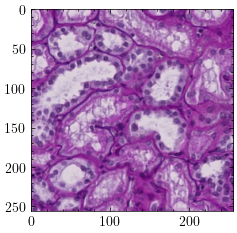

In [14]:
import matplotlib.pyplot as plt

plt.imshow(image.squeeze(0).permute(1, 2, 0))

In [15]:
model = model.to("cuda")
image = image.to("cuda")

In [16]:
image_plt.size()

torch.Size([3, 256, 256])

In [17]:
prediction = model(image.unsqueeze(0))

In [41]:
import torch.nn.functional as F

# probs = F.softmax(prediction[2], dim=1)
classes = torch.argmax(prediction[2], dim=1)

In [42]:
classes.size()

torch.Size([1, 256, 256])

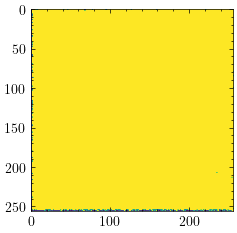

In [43]:
plt.imshow(classes[0].detach().cpu())

In [44]:
a = F.softmax(prediction[2], dim=1)
a.size()

torch.Size([1, 4, 256, 256])

: 

In [107]:
a = torch.argmax(pred, dim=1)
a.size()

torch.Size([1, 64, 64])

In [109]:
a.min(), a.max()

(tensor(0, device='cuda:0'), tensor(0, device='cuda:0'))

: 

In [96]:
import torch.nn.functional as F

In [97]:
probs = F.softmax(prediction[2], dim=1)
pred = torch.argmax(probs, dim=1, keepdims=True)
pred.size()

torch.Size([1, 1, 64, 64])

In [98]:
pred.min(), pred.max()

(tensor(0, device='cuda:0'), tensor(0, device='cuda:0'))

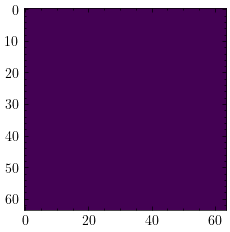

In [99]:
plt.imshow(pred.squeeze().detach().cpu())

In [74]:
from skimage.color import label2rgb

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


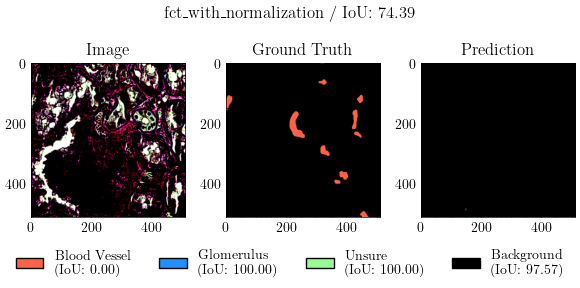

In [23]:
_ = visualize_image(model, ckpt, image, target, transforms=model_transforms, pred_idx=2)

In [26]:
transforms = T.Compose(
    [
        T.ToTensor(),
        T.Resize((64, 64)),
        T.Normalize(train_dataset_mean, train_dataset_std),
    ]
)
model_transforms = T.Compose([])
# [
# T.Normalize(train_dataset_mean, train_dataset_std),
# ]
# )

dataset = ValDataset(DATA_DIR, transform=transforms, with_background=True)
image, target = dataset.get(2, transform=transforms)
# target = target[:1, :, :]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


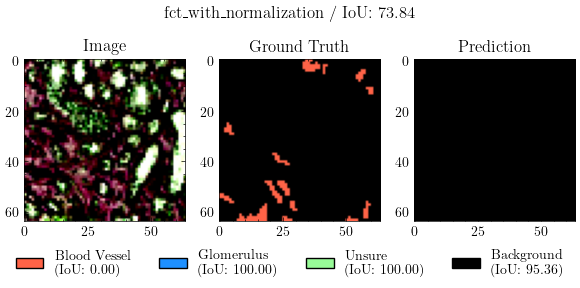

In [27]:
_ = visualize_image(model, ckpt, image, target, transforms=model_transforms, pred_idx=2)

_